In [1]:
import numpy as np
import pandas as pd

In [2]:
# data frame object
df = pd.read_csv('../TextFiles/smsspamcollection.tsv', sep='\t')

In [3]:
# show first five rows
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isnull()

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5567,False,False,False,False
5568,False,False,False,False
5569,False,False,False,False
5570,False,False,False,False


In [6]:
df.isnull().sum()
# if you see a '1', it means the is a missing value

label      0
message    0
length     0
punct      0
dtype: int64

In [7]:
len(df)

5572

In [8]:
# getting a column value
df['label']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [9]:
# getting the unique values of this column
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [10]:
# see how many values of each unique value do we have
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

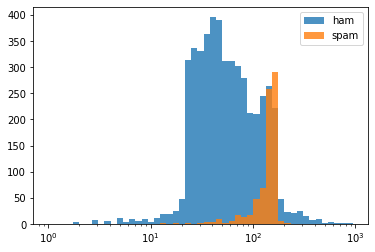

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
# histograms of the length column
plt.hist(df[df['label']=='ham']['length'], bins=bins, alpha=0.8)
plt.hist(df[df['label']=='spam']['length'], bins=bins, alpha=0.8)
plt.legend(('ham', 'spam'))
plt.show()

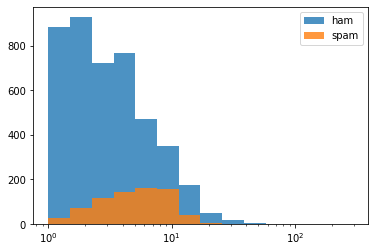

In [12]:
plt.xscale('log')
bins = 1.5**(np.arange(0, 15))
# histrograms of the punctuation column
plt.hist(df[df['label']=='ham']['punct'], bins=bins, alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'], bins=bins, alpha=0.8)
plt.legend(('ham', 'spam'))
plt.show()

### How to conduct a machine learning model with SciKit Lean

In [13]:
# 1. Split the data into a Train Set and a Test Set
from sklearn.model_selection import train_test_split

In [14]:
# X feature data
X = df[['length', 'punct']]
# y is our label
y = df['label']

# shift + tab shows the method's documentation 
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3, # 30% of the data goes to the Test Set
    random_state=42 # to get an specific test split (not really important)
)

In [15]:
# rows, columns
X_train.shape # training data for the features

(3900, 2)

In [20]:
# X_test.shape # test data
X_test

,length,punct
3245,147,14
944,116,1
1044,102,3
2484,45,0
812,112,4
...,...,...
2505,160,10
2525,99,5
4975,62,5
650,97,11


In [21]:
# y_test.shape
y_test # labels that corresponds with X_test

3245     ham
944      ham
1044     ham
2484     ham
812      ham
        ... 
2505     ham
2525    spam
4975     ham
650     spam
4463     ham
Name: label, Length: 1672, dtype: object

In [31]:
y_train.shape

(3900,)

In [27]:
# 2. Create and train a machine learning model

# We are going to train multiple moderns
# The extact process is similar regardless the model that you choose

from sklearn.linear_model import LogisticRegression

In [33]:
lr_model = LogisticRegression(solver='lbfgs')

In [34]:
# train our model
lr_model.fit(X_train, y_train) # once we run this, our model is ready to predict data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)